## 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.
What is the probability that no cars drive up in the noon hour?

What is the probability that 3 or more cars come through the drive through?

How likely is it that the drive through gets at least 1 car?

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

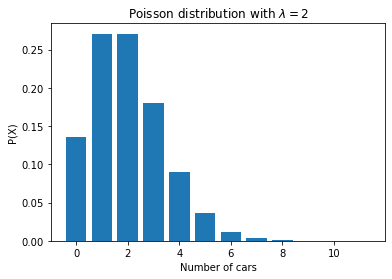

In [46]:
λ = 2

x = np.arange(0,12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.title('Poisson distribution with $λ = 2$')
plt.xlabel('Number of cars')
plt.ylabel('P(X)');

In [5]:
probability_of_zero_cars = stats.poisson(2).pmf(0)

In [6]:
probability_of_zero_cars

0.1353352832366127

In [7]:
three_or_more_cars = stats.poisson(2).sf(2)

In [8]:
three_or_more_cars

0.32332358381693654

In [47]:
at_least_one_car = stats.poisson(2).sf(0)

In [48]:
at_least_one_car

0.8646647167633873

## 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:
* What grade point average is required to be in the top 5% of the graduating class?
* What GPA constitutes the bottom 15% of the class?
* An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
* If I have a GPA of 3.5, what percentile am I in?

### What grade point average is required to b in the top 5% of the graduating class?

In [13]:
mu = 3.0
sigma = 0.3

grades = stats.norm(mu,sigma)

In [34]:
grades.isf(.05)

3.4934560880854417

In [38]:
grades.sf(3.493)

0.050156992606219454

### What GPA constitutes the bottom 15% of the class?

In [39]:
grades.ppf(.15)

2.689069983151863

### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?

get GPA of .21 and .30 as this is the range for the third decile

In [42]:
print(grades.ppf(.21))
print(grades.ppf(.30))

2.7580736258945278
2.842679846187588


### If I have a GPA of 3.5, what percentile am I in?

In [43]:
grades.cdf(3.5)

0.9522096477271853

### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [52]:
# Use a binomial distribution
visitors = 4326
mu = .02

stats.binom(visitors, mu).sf(96)

0.1397582363130086

### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
What is the probability that at least one of your first 60 answers is correct?